In [40]:
import os
import sys
import glob
import numpy as np
from tqdm import trange
from astropy.io import fits
from astropy.table import Table, vstack
from astropy.convolution import convolve, Gaussian1DKernel
import astropy.units as u
import astropy.coordinates as coord
import matplotlib
import matplotlib.pyplot as plt
from astropy.table import Column
from tqdm import trange
import pandas as pd
import fitsio
from astropy.table import Table, vstack
from astropy import units as u
from astropy.coordinates import SkyCoord
from easyquery import Query, QueryMaker
from scipy.stats import binomtest
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap, BoundaryNorm
import h5py
from astropy.cosmology import Planck18

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

rootdir = '/global/u1/v/virajvm/'
sys.path.append(os.path.join(rootdir, 'DESI2_LOWZ/desi_dwarfs/code'))

from desi_lowz_funcs import make_subplots, match_c_to_catalog, print_radecs
from desi_lowz_funcs import calc_normalized_dist
from desi_lowz_funcs import find_objects_nearby
from construct_dwarf_galaxy_catalogs import process_sga_matches
from catalog_paper_plots import make_bar_pie



In [4]:
sample_colors = {"BGS_BRIGHT" : "#882255", "BGS_FAINT": "#CC6677", "LOWZ":"#DDCC77", "ELG": "#88CCEE" }


In [6]:
tot_cat = Table.read("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/desi_y1_dwarf_combine_catalog.fits")


In [50]:
tot_cat[tot_cat["TARGETID"] == 39627703925606400]

TARGETID,SURVEY,PROGRAM,HEALPIX,TILEID_LIST,RA,DEC,Z,ZWARN,DELTACHI2,SPECTYPE,Z_RR,TSNR2_QSO,TSNR2_LYA,PHOTSYS,LS_ID,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,EBV,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,MAG_G_DR9,MAG_R_DR9,MAG_Z_DR9,MAG_W1,MAG_W2,MAG_G_ERR_DR9,MAG_R_ERR_DR9,MAG_Z_ERR_DR9,MAG_W1_ERR,MAG_W2_ERR,OBJID,BRICKNAME,SIGMA_G,FRACFLUX_G,RCHISQ_G,SIGMA_GOOD_G,SIGMA_R,FRACFLUX_R,RCHISQ_R,SIGMA_GOOD_R,SIGMA_Z,FRACFLUX_Z,RCHISQ_Z,SIGMA_GOOD_Z,SHAPE_R,SHAPE_R_ERR,MU_R,MU_R_ERR,SERSIC,SERSIC_IVAR,BA,TYPE,PHI,FIBERMAG_R,MASKBITS,LOGM_SAGA_DR9,LOGM_M24_DR9,SWEEP,is_south,STARFDIST,STARDIST_DEG,STARMAG,STAR_RADIUS_ARCSEC,STAR_RA,STAR_DEC,SAMPLE,SGA_ID_MATCH,SGA_D26_NORM_DIST,SGA_DIST_DEG,IMAGE_PATH,FILE_PATH,MAG_G_APERTURE_COG,MAG_R_APERTURE_COG,MAG_Z_APERTURE_COG,MAG_G_APERTURE_COG_ERR,MAG_R_APERTURE_COG_ERR,MAG_Z_APERTURE_COG_ERR,MAG_G_APERTURE_COG_PARAMS,MAG_R_APERTURE_COG_PARAMS,MAG_Z_APERTURE_COG_PARAMS,MAG_G_APERTURE_COG_PARAMS_ERR,MAG_R_APERTURE_COG_PARAMS_ERR,MAG_Z_APERTURE_COG_PARAMS_ERR,LOGM_SAGA_APERTURE_COG,PCNN_FRAGMENT,NEAREST_STAR_NORM_DIST,MAG_G_APERTURE_R4,MAG_R_APERTURE_R4,MAG_Z_APERTURE_R4,MAG_G,MAG_G_ERR,MAG_R,MAG_R_ERR,MAG_Z,MAG_Z_ERR,LOGM_SAGA,HALPHA_FLUX,HALPHA_FLUX_IVAR,SNR_B,SNR_R,SNR_Z,HALPHA_EW,HALPHA_EW_IVAR
int64,bytes7,bytes6,int32,bytes47,float64,float64,float64,int64,float64,bytes6,float64,float32,float32,bytes1,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes3,float32,float32,int16,float64,float64,bytes29,int64,float32,float32,float32,float32,float32,float32,bytes10,int64,float64,float64,bytes128,bytes128,float64,float64,float64,float64,float64,float64,float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32
39627703925606400,main,bright,45037,20093,223.14148553539334,-3.576811208211276,0.006370129202604548,0,1959.538328369148,GALAXY,0.006370129202604548,5.792617,9.665614,S,9906620154710016,0.902751,1.1561852,1.4899101,1.2151963,1.4125069,1.6665782,14.097852,16.38691,19.334467,5.6869774,2.6760304,63.85813,-1056.7844,91.55198,46.32217,6.5989294,0.9921916,0.30180132,0.0010533719,1.7840293e-05,0.10046579,0.74288493,0.81853414,0.8939935,0.9831182,0.98959833,0.99777246,0.9991583,19.627117,19.463757,19.28417,20.612797,21.431273,0.008058287,0.009746261,0.021885706,0.19188909,0.73939747,2048,2231m035,134.8922,1.4670241,1.5304328,134.8922,111.52995,4.3489957,2.346791,111.52995,49.66711,12.1610155,5.229352,49.66711,3.5334299,0.011043278,24.200188,0.011875533,1.0,0.0,0.4378884,EXP,-28.990562,22.342432,0,6.550788571012598,6.783158546099403,sweep-220m005-230p000-pz.fits,1,99.0,99.0,99.0,99.0,99.0,99.0,BGS_BRIGHT,999999,inf,0.013254438686933784,/pscratch/sd/v/virajvm/redo_photometry_plots/all_deshreds_cutouts/image_tgid_39627703925606400_ra_223.141486_dec_-3.576811.fits,/pscratch/sd/v/virajvm/redo_photometry_plots/all_deshreds/south/sweep-220m005-230p000/2231m035/BGS_BRIGHT_tgid_39627703925606400,14.525777770441739,14.19142526666006,13.968553587832929,0.009764184537868913,0.01028494899254917,0.008921340072592482,14.848674720388619 .. 8.169361898062803,14.408933698184098 .. 7.8055578407001525,14.090217620172979 .. 7.698071389381228,0.009764184537868913 .. 1

In [48]:
np.median(tot_cat["Z"])

0.07678501879051926

In [49]:
np.sum(tot_cat["Z"] > 0.2)/ len(tot_cat["Z"])

0.09524451995010752

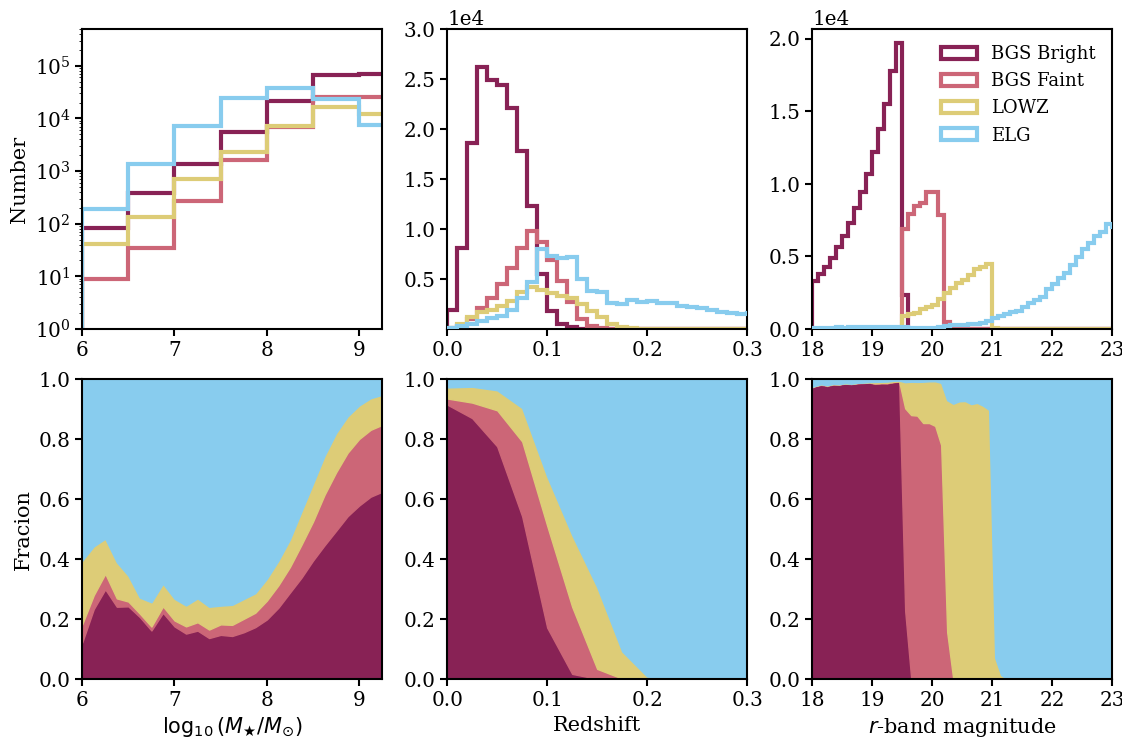

In [47]:


fig,ax = make_subplots(nrow=2,ncol=3,return_fig=True,col_spacing = 0.65,row_spacing = 0.5)

#first column will be stellar mass, and then redshift and stellar mass
    
text_titles = ["BGS Bright", "BGS Faint", "LOWZ", "ELG"]
    
mask_i = (tot_cat["SAMPLE"] == "BGS_BRIGHT") # | (tot_cat["SAMPLE"] == "BGS_FAINT" )

hist_lw = 3

ax[3].hist( tot_cat["LOGM_SAGA"][mask_i], bins = np.arange(6,10,0.5), 
           color = sample_colors[samples[0]], histtype = "step", lw = hist_lw, zorder = 1,alpha = 1, label = "BGS Bright" )

mask_i = (tot_cat["SAMPLE"] == "BGS_FAINT" )
ax[3].hist( tot_cat["LOGM_SAGA"][mask_i], bins = np.arange(6,10,0.5), 
           color = sample_colors[samples[1]], histtype = "step", lw = hist_lw, zorder = 1,label = "BGS Faint" )

mask_i = (tot_cat["SAMPLE"] == "LOWZ" )
ax[3].hist( tot_cat["LOGM_SAGA"][mask_i], bins = np.arange(6,10,0.5), 
           color = sample_colors[samples[2]], histtype = "step", lw = hist_lw, zorder = 1,label = "LOWZ" )

mask_i = (tot_cat["SAMPLE"] == "ELG" )
ax[3].hist( tot_cat["LOGM_SAGA"][mask_i], bins = np.arange(6,10,0.5), 
           color = sample_colors[samples[3]], histtype = "step", lw = hist_lw, zorder = 1,label = "ELG" )


ax[3].set_yscale("log")
ax[3].set_xlim([6,9.25])
ax[3].set_ylim([1,5e5])

binw = 0.01

text_titles = ["BGS Bright", "BGS Faint", "LOWZ", "ELG"]

mask_i = (tot_cat["SAMPLE"] == "BGS_BRIGHT")
ax[4].hist(tot_cat["Z"][mask_i], bins = np.arange(0,0.45,binw),
           color = sample_colors[samples[0]], histtype = "step", lw = hist_lw, zorder = 0,alpha = 1,density=False, label = "BGS Bright" )

mask_i = (tot_cat["SAMPLE"] == "BGS_FAINT" )
ax[4].hist( tot_cat["Z"][mask_i], bins = np.arange(0,0.45,binw),
           color = sample_colors[samples[1]], histtype = "step", lw = hist_lw, zorder = 1,label = "BGS Faint",density=False )

mask_i = (tot_cat["SAMPLE"] == "LOWZ" )
ax[4].hist( tot_cat["Z"][mask_i], bins = np.arange(0,0.45,binw),
           color = sample_colors[samples[2]], histtype = "step", lw = hist_lw, zorder = 2,density=False,label = "LOWZ")

mask_i = (tot_cat["SAMPLE"] == "ELG" )
ax[4].hist( tot_cat["Z"][mask_i], bins = np.arange(0,0.45,binw),
           color = sample_colors[samples[3]], histtype = "step", lw = hist_lw, zorder = 3,label = "ELG",density=False)


ax[4].set_xlim([0,0.3])
ax[4].set_ylim([1,3e4])
ax[4].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

#

binw = 0.1

mask_i = (tot_cat["SAMPLE"] == "BGS_BRIGHT")
ax[5].hist(tot_cat["MAG_R"][mask_i], bins = np.arange(18,23.5,binw),
           color = sample_colors[samples[0]], histtype = "step", lw = hist_lw, zorder = 0,alpha = 1,density=False, label = "BGS Bright" )

mask_i = (tot_cat["SAMPLE"] == "BGS_FAINT" )
ax[5].hist( tot_cat["MAG_R"][mask_i], bins = np.arange(18,23.5,binw),
           color = sample_colors[samples[1]], histtype = "step", lw = hist_lw, zorder = 1,label = "BGS Faint",density=False )

mask_i = (tot_cat["SAMPLE"] == "LOWZ" )
ax[5].hist( tot_cat["MAG_R"][mask_i], bins = np.arange(18,23.5,binw),
           color = sample_colors[samples[2]], histtype = "step", lw = hist_lw, zorder = 2,density=False,label = "LOWZ")

mask_i = (tot_cat["SAMPLE"] == "ELG" )
ax[5].hist( tot_cat["MAG_R"][mask_i], bins = np.arange(18,23.5,binw),
           color = sample_colors[samples[3]], histtype = "step", lw = hist_lw, zorder = 3,label = "ELG",density=False)


ax[5].set_xlim([18,23])
ax[5].legend(frameon=False,fontsize = 13,loc = "upper right",ncol = 1)
ax[5].ticklabel_format(style='sci', axis='y', scilimits=(0,0))


##################

make_bar_pie(ax[0], tot_cat, "LOGM_SAGA", bins =  np.arange(6-0.125/2, 9.5,0.125))

ax[0].set_xlim(6, 9.25)
ax[0].set_ylim(0, 1)
ax[0].set_xlabel(r"$\log_{10}(M_{\bigstar}/M_{\odot})$",fontsize=15)
# ax.set_title("Fractional Sample Composition vs Stellar Mass")

make_bar_pie(ax[1], tot_cat, "Z", bins =  np.arange(0-0.025/2, 0.4,0.025) )
ax[1].set_xlim(0.0, 0.3)
ax[1].set_ylim(0, 1)
ax[1].set_xlabel("Redshift",fontsize=15)


make_bar_pie(ax[2], tot_cat, "MAG_R", bins =  np.arange(17,23.5,0.1) )
ax[2].set_xlim(18, 23)
ax[2].set_ylim(0, 1)
ax[2].set_xlabel(r"$r$-band magnitude",fontsize=15)
ax[3].set_ylabel(r"Number",fontsize = 15)
ax[0].set_ylabel("Fracion",fontsize = 15)

fig.savefig("/global/homes/v/virajvm/DESI2_LOWZ/quenched_fracs_nbs/paper_plots/dwarf_summaries.pdf",bbox_inches="tight")
plt.show()


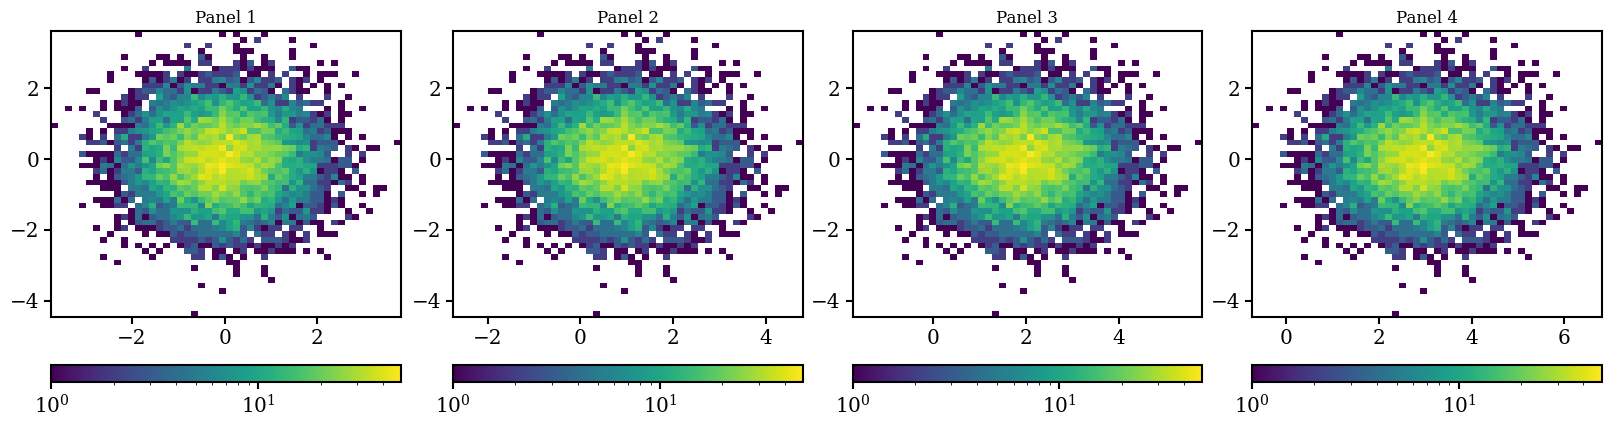

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Mock data
np.random.seed(0)
x = np.random.normal(0, 1, 10000)
y = np.random.normal(0, 1, 10000)

fig, ax = plt.subplots(1, 4, figsize=(16, 4), constrained_layout=True)

for i in range(4):
    # Make hist2d
    h = ax[i].hist2d(x + i, y, bins=50,
                     norm=LogNorm(),
                     cmap="viridis")

    im = h[3]  # QuadMesh (needed for colorbar)

    ax[i].set_title(f"Panel {i+1}")

    cbar = plt.colorbar(im, ax=ax[i], orientation='horizontal', pad=0.05)
    cbar.ax.set_position([
        0.295,   # Left position
        0.62,  # Top position
        ax[i].get_position().width * 0.1,  # Width (40% of plot width)
        0.02  # Height (thin bar)
    ])
    

    # # Add inset colorbar below each subplot
    # cax = inset_axes(ax[i],
    #                  width="60%",   # % of parent axis width
    #                  height="5%",   # % of parent axis height
    #                  loc="lower center",
    #                  bbox_to_anchor=(-0.1, 0.75, 1, 1),  # shift down a bit
    #                  bbox_transform=ax[i].transAxes,
    #                  borderpad=0)

    # cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
    # cbar.ax.tick_params(labelsize=8)

plt.show()


In [13]:
from astropy.io import ascii


In [14]:

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

clean_cat = Table.read("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/desi_y1_dwarf_clean_catalog_v4.fits")

print(len(clean_cat))
clean_cat = clean_cat[clean_cat["LOGM_SAGA"] < 9.5]
print(len(clean_cat))

##match the clean cat with other catalogs
gswlc_cat = ascii.read("/pscratch/sd/v/virajvm/desi2_lowz_data/catalogs/GSWLC-X2.dat")
iron = SkyCoord(np.array(clean_cat["RA"])*u.degree, np.array(clean_cat["DEC"])*u.degree  )
gswlc = SkyCoord(np.array(gswlc_cat["RA"])*u.degree, np.array(gswlc_cat["DEC"])*u.degree  )
idx, d2d, _ = iron.match_to_catalog_sky(gswlc)
clean_cat_gswlc_match = clean_cat[d2d.arcsec < 1]
gswlc_match = gswlc_cat[idx][d2d.arcsec < 1]

##these are stellar masses from Hu Zhou XMPG paper. They also use CIGALE here and no AGN is used
hu_cat= Table.read("/global/cfs/cdirs/desi/users/dscholte/data_to_share/sample_catalog_viraj_29052024.fits")
iron = SkyCoord(np.array(clean_cat["RA"])*u.degree, np.array(clean_cat["DEC"])*u.degree  )
hu = SkyCoord(np.array(hu_cat["RA"])*u.degree, np.array(hu_cat["DEC"])*u.degree  )
idx, d2d, _ = iron.match_to_catalog_sky(hu)
clean_cat_hu_match = clean_cat[d2d.arcsec < 1]
hu_match = hu_cat[idx][d2d.arcsec < 1]

###FASTSPECFIT
print("Reading fastspecfit!")
iron_vac = fits.open("/global/cfs/cdirs/desi/public/dr1/vac/dr1/fastspecfit/iron/v2.1/catalogs/fastspec-iron.fits")
fspec_mstar = iron_vac[1].data["LOGMSTAR"]
fspec_ra = iron_vac[2].data["RA"]
fspec_dec = iron_vac[2].data["DEC"]
catalog = SkyCoord(ra= fspec_ra* u.degree, dec= fspec_dec*u.degree )
c = SkyCoord(ra=np.array(clean_cat["RA"])*u.degree, dec=np.array(clean_cat["DEC"])*u.degree )
idx, d2d, d3d = c.match_to_catalog_sky(catalog)
fspec_mstar_f = fspec_mstar[idx][d2d.arcsec < 1]
clean_cat_fspec_match = clean_cat[d2d.arcsec < 1]
print("Finished matching fastspecfit!")

## loading the cosmos 2020 catalog
# cos2020_data = np.load("/pscratch/sd/v/virajvm/desi2_lowz_data/catalogs/cosmos2020_data.npy")
# iron = SkyCoord(np.array(clean_cat["RA"])*u.degree, np.array(clean_cat["DEC"])*u.degree  )
# cos = SkyCoord( cos2020_data[0]*u.degree, cos2020_data[1]*u.degree  )
# idx, d2d, _ = iron.match_to_catalog_sky(cos)
# clean_cat_cos_match = clean_cat[d2d.arcsec < 1]
# cos2020_mstar = cos2020_data[2][idx][d2d.arcsec < 1]


416295
416295
Reading fastspecfit!
Finished matching fastspecfit!


In [20]:
import cmasher as cmr
from scipy.stats import median_abs_deviation


def measure_bias_scatter(quant_1, quant_2):
    '''
    Meausure the median of quant_1 - quant_2 and the scatter in this difference. We restrict ourselves to objects
    '''

    quant_1f = quant_1[~np.isnan(quant_1) & ~np.isnan(quant_2) ]
    quant_2f = quant_2[~np.isnan(quant_2) & ~np.isnan(quant_2) ]

    med_val = np.median(quant_1f - quant_2f)
    scatters = quant_1f - quant_2f - med_val

    sigma =  median_abs_deviation(scatters, scale='normal')

    print(med_val, sigma)
    return med_val, sigma


0.09112712166822767 0.06799898450747308
0.056923815195920824 0.08259985768510893
0.283468032067681 0.14143255646255665
-0.1514037604906573 0.018481214030412293


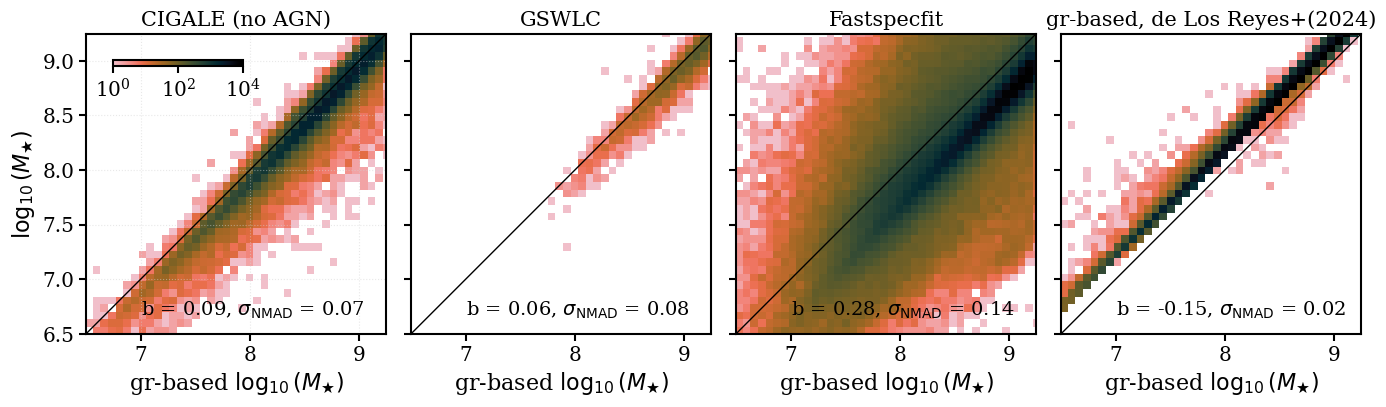

In [39]:

# ##make the plot

ax = make_subplots(ncol = 4,nrow = 1,col_spacing = 0.25)

title_size = 15

xmstar = "LOGM_SAGA"
cmap = cmr.dusk_r

vmin = 1
vmax = 10000
xpos = 7
ypos = 6.67
fsize = 14

ax_id = 0
ax[ax_id].set_title(r"CIGALE (no AGN)",fontsize = title_size )
h, xedges, yedges, im=ax[ax_id].hist2d(clean_cat_hu_match[xmstar],hu_match["LOGMSTAR_HU"],range= ( (6,9.5),(6,9.5)),bins= 50,norm=LogNorm(vmin=vmin,vmax=vmax) ,cmap=cmap, rasterized=True)

bias, scatter = measure_bias_scatter(clean_cat_hu_match[xmstar].data,hu_match["LOGMSTAR_HU"])

ax[ax_id].text( xpos,ypos,rf"b = {bias:.2f}, $\sigma_{{\rm NMAD}}$ = {scatter:.2f}",fontsize = fsize)

 # Create a colorbar
cbar = plt.colorbar(im, ax=ax[ax_id], orientation='horizontal', pad=0.05)
cbar.set_ticks([1, 100, 10000])
cbar.ax.set_position([
    0.04,   # Left position
    0.62,  # Top position
    ax[ax_id].get_position().width * 0.1,  # Width (40% of plot width)
    0.02  # Height (thin bar)
])

####

ax_id = 1
ax[ax_id].set_title(r"GSWLC",fontsize = title_size )
h, xedges, yedges, im=  ax[ax_id].hist2d(clean_cat_gswlc_match[xmstar],gswlc_match["LOGMSTAR"],range= ( (6,9.5),(6,9.5)),bins= 50,norm=LogNorm(vmin=vmin, vmax=vmax) ,cmap=cmap, rasterized=True)

bias, scatter = measure_bias_scatter(clean_cat_gswlc_match[xmstar].data,gswlc_match["LOGMSTAR"].data)
ax[ax_id].text( xpos,ypos,rf"b = {bias:.2f}, $\sigma_{{\rm NMAD}}$ = {scatter:.2f}",fontsize = fsize)

#  # Create a colorbar
# cbar = plt.colorbar(im, ax=ax[ax_id], orientation='horizontal', pad=0.05)
# cbar.ax.set_position([
#     0.795,   # Left position
#     0.62,  # Top position
#     ax[ax_id].get_position().width * 0.1,  # Width (40% of plot width)
#     0.02  # Height (thin bar)
# ])    

#######

ax_id = 2
ax[ax_id].set_title(r"Fastspecfit",fontsize = title_size )
h, xedges, yedges, im =  ax[ax_id].hist2d(clean_cat_fspec_match[xmstar],fspec_mstar_f,range= ( (6,9.5),(6,9.5)),bins= 50,norm=LogNorm(vmin=vmin, vmax=vmax) ,cmap=cmap, rasterized=True)

bias, scatter = measure_bias_scatter(clean_cat_fspec_match[xmstar].data,fspec_mstar_f)
ax[ax_id].text( xpos,ypos,rf"b = {bias:.2f}, $\sigma_{{\rm NMAD}}$ = {scatter:.2f}",fontsize = fsize)

 # Create a colorbar
# cbar = plt.colorbar(im, ax=ax[ax_id], orientation='horizontal', pad=0.05)
# cbar.ax.set_position([
#     1.045,   # Left position
#     0.62,  # Top position
#     ax[ax_id].get_position().width * 0.1,  # Width (40% of plot width)
#     0.02  # Height (thin bar)
# ])

#######

ax_id = 3
ax[ax_id].set_title(r"gr-based, de Los Reyes+(2024)",fontsize = title_size )
h, xedges, yedges, im =  ax[ax_id].hist2d(clean_cat[xmstar], clean_cat["LOGM_M24"] ,range= ( (6,9.5),(6,9.5)),bins= 50,norm=LogNorm(vmin=vmin, vmax=vmax) ,cmap=cmap, rasterized=True)

bias,scatter = measure_bias_scatter(clean_cat[xmstar],clean_cat["LOGM_M24"]) 
ax[ax_id].text( xpos,ypos,rf"b = {bias:.2f}, $\sigma_{{\rm NMAD}}$ = {scatter:.2f}",fontsize = fsize)

 # Create a colorbar
# cbar = plt.colorbar(im, ax=ax[ax_id], orientation='horizontal', pad=0.05)
# cbar.ax.set_position([
#     0.5,   # Left position
#     0.62,  # Top position
#     ax[ax_id].get_position().width * 0.1,  # Width (40% of plot width)
#     0.02  # Height (thin bar)
# ])

for i,axi in enumerate(ax):
    axi.set_xlim([6.5,9.25])
    axi.set_ylim([6.5,9.25])
    axi.plot([6,11],[6,11],color = "k",lw = 1)
    axi.set_xlabel(r"gr-based $\log_{10}(M_{\bigstar})$",size= 16)
    ax[0].set_ylabel(r"$\log_{10}(M_{\bigstar})$",size= 16)
    ax[0].grid(ls = ":",color = "lightgrey",alpha = 0.5)

    if i != 0:
        axi.set_yticklabels([])

plt.savefig("/global/homes/v/virajvm/DESI2_LOWZ/quenched_fracs_nbs/paper_plots/stellar_mass_comp.pdf",bbox_inches="tight")
plt.show()